# 1. Import

**1.1 Import kagglehub and download dataset**

In [ ]:
!pip install kagglehub
import kagglehub

# Download the latest version of the dataset
path = kagglehub.dataset_download("vipoooool/new-plant-diseases-dataset")

print("Path to dataset files:", path)

100%|██████████| 2.70G/2.70G [02:05<00:00, 23.2MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2


**1.2 Define the paths**

In [ ]:
import os

# Define the dataset path
root_folder = "/root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2"

data_dir = os.path.join(root_folder, 'new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/')

test_path = os.path.join(root_folder, 'test/test')
train_path = os.path.join(data_dir, 'train')
valid_path = os.path.join(data_dir, 'valid')

# Count the number of folders in a directory
def count_folders(path):
    if os.path.exists(path):
        return len([d for d in os.listdir(path) if os.path.isdir(os.path.join(path, d))])
    else:
        print(f"Path does not exist: {path}")
        return 0

# Count the number of files in a directory
def count_files(path):
    if os.path.exists(path):
        return len([f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))])
    else:
        print(f"Path does not exist: {path}")
        return 0

# Function to count files in each folder of a given directory
def count_files_in_folders(path):
    if not os.path.exists(path):
        print(f"Path does not exist: {path}")
        return {}

    folder_file_counts = {}
    for folder in os.listdir(path):
        folder_path = os.path.join(path, folder)
        if os.path.isdir(folder_path):
            file_count = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
            folder_file_counts[folder] = file_count

    return folder_file_counts

# Print counts
print(f"Number of folders in train_path: {count_folders(train_path)}")
print(f"Number of folders in valid_path: {count_folders(valid_path)}")
print(f"Number of files in test_path: {count_files(test_path)}")
print('-------------------------------------------------------------------')
# Count files in each folder
train_folder_counts = count_files_in_folders(train_path)
valid_folder_counts = count_files_in_folders(valid_path)
# Display results
print("Files in each folder (train_path):")
for folder, count in train_folder_counts.items():
    print(f"{folder}: {count} files")

print("\nFiles in each folder (valid_path):")
for folder, count in valid_folder_counts.items():
    print(f"{folder}: {count} files")

Number of folders in train_path: 38
Number of folders in valid_path: 38
Number of files in test_path: 33
-------------------------------------------------------------------
Files in each folder (train_path):
Tomato___Late_blight: 1851 files
Corn_(maize)___Common_rust_: 1907 files
Potato___Late_blight: 1939 files
Pepper,_bell___Bacterial_spot: 1913 files
Tomato___Tomato_mosaic_virus: 1790 files
Tomato___Spider_mites Two-spotted_spider_mite: 1741 files
Raspberry___healthy: 1781 files
Peach___healthy: 1728 files
Pepper,_bell___healthy: 1988 files
Tomato___Early_blight: 1920 files
Peach___Bacterial_spot: 1838 files
Apple___Black_rot: 1987 files
Tomato___Septoria_leaf_spot: 1745 files
Potato___healthy: 1824 files
Cherry_(including_sour)___healthy: 1826 files
Tomato___Target_Spot: 1827 files
Cherry_(including_sour)___Powdery_mildew: 1683 files
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot: 1642 files
Tomato___Leaf_Mold: 1882 files
Strawberry___healthy: 1824 files
Blueberry___healthy: 18

# 2. Importing libraries



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import shutil

from tensorflow.keras.preprocessing.image import ImageDataGenerator


import tensorflow as tf
# Check GPU availability
if tf.config.list_physical_devices('GPU'):
    print("OK! GPU is available and ready for use!")
else:
    print("NO! GPU not found. Falling back to CPU.")

import PIL
import scipy

print(PIL.__version__)
print(scipy.__version__)

OK! GPU is available and ready for use!
11.1.0
1.13.1


# Generators

In [ ]:
# Define sizes

IMG_SIZE = (224, 224)

BATCH_SIZE = 32

# Define paths
train_path = train_path
valid_path = valid_path

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(rescale=1.0 / 255)
valid_datagen = ImageDataGenerator(rescale=1.0 / 255)

# Generators
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True)

val_generator = valid_datagen.flow_from_directory(
    valid_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False)



Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


#Load Model


In [ ]:
import keras
keras.backend.clear_session()

from tensorflow.keras.models import load_model
from google.colab import drive
drive.mount('/content/drive')

save_dir = "/content/drive/MyDrive/DS_models"

# Models
MBN_u = "MobileNetV2_unfrozen_lr_E-3"
MBN_u1b = "MobileNetV2_1Block_unfrozen_lr_E-3"
VGG16_u = "VGG16_unfrozen_lr_E-3"
VGG16_u_lr4 = "VGG16_unfrozen_lr_E-4"
VGG16_u1b = "VGG16_1Block_unfrozen_lr_E-3"
VGG16_u_224 = "VGG16_unfrozen_lr_E-3_224size"

# -> CHOOSE MODEL
Model_name = VGG16_u_224  # <---------  CHOOSE MODEL -----------
model_path = f"{save_dir}/{Model_name}.keras"

# Load the model
model = load_model(model_path)
print("Model loaded successfully!")

model.summary()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model loaded successfully!


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │         525,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 38)                  │          19,494 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 47,352,884 (180.64 MB)

 Trainable params: 15,784,294 (60.21 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 31,568,590 (120.42 MB)

#Evaluate

In [ ]:
#Evaluate the model on the training set   ---- To BE USED with GPU -----
loss, accuracy = model.evaluate(train_generator)
print(f'Training loss: {loss:.2f}')
print(f'Training accuracy: {accuracy:.2f}')


#Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(val_generator)
print(f'Validation loss: {val_loss:.2f}')
print(f'Validation accuracy: {val_accuracy:.2f}')

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2197/2197 ━━━━━━━━━━━━━━━━━━━━ 177s 75ms/step - accuracy: 0.9859 - loss: 0.0467
Training loss: 0.05
Training accuracy: 0.99
550/550 ━━━━━━━━━━━━━━━━━━━━ 42s 76ms/step - accuracy: 0.9674 - loss: 0.1161
Validation loss: 0.14
Validation accuracy: 0.96


Prediction & Classification report

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
# Generate predictions for validation set
val_pred = model.predict(val_generator)
val_pred_classes = np.argmax(val_pred, axis=1)
true_classes = val_generator.classes

# Classification report
class_report = classification_report(true_classes, val_pred_classes)
print("Classification Report:\n", class_report)

550/550 ━━━━━━━━━━━━━━━━━━━━ 40s 71ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96       504
           1       0.97      0.99      0.98       497
           2       0.96      0.97      0.96       440
           3       0.98      0.95      0.96       502
           4       0.96      0.98      0.97       454
           5       0.98      1.00      0.99       421
           6       0.99      0.98      0.99       456
           7       0.94      0.95      0.95       410
           8       0.99      1.00      1.00       477
           9       0.97      0.94      0.95       477
          10       1.00      1.00      1.00       465
          11       0.96      0.98      0.97       472
          12       0.98      0.98      0.98       480
          13       0.97      1.00      0.99       430
          14       1.00      1.00      1.00       423
          15       1.00      0.97      0.98       503
          16  

Confusion matrix

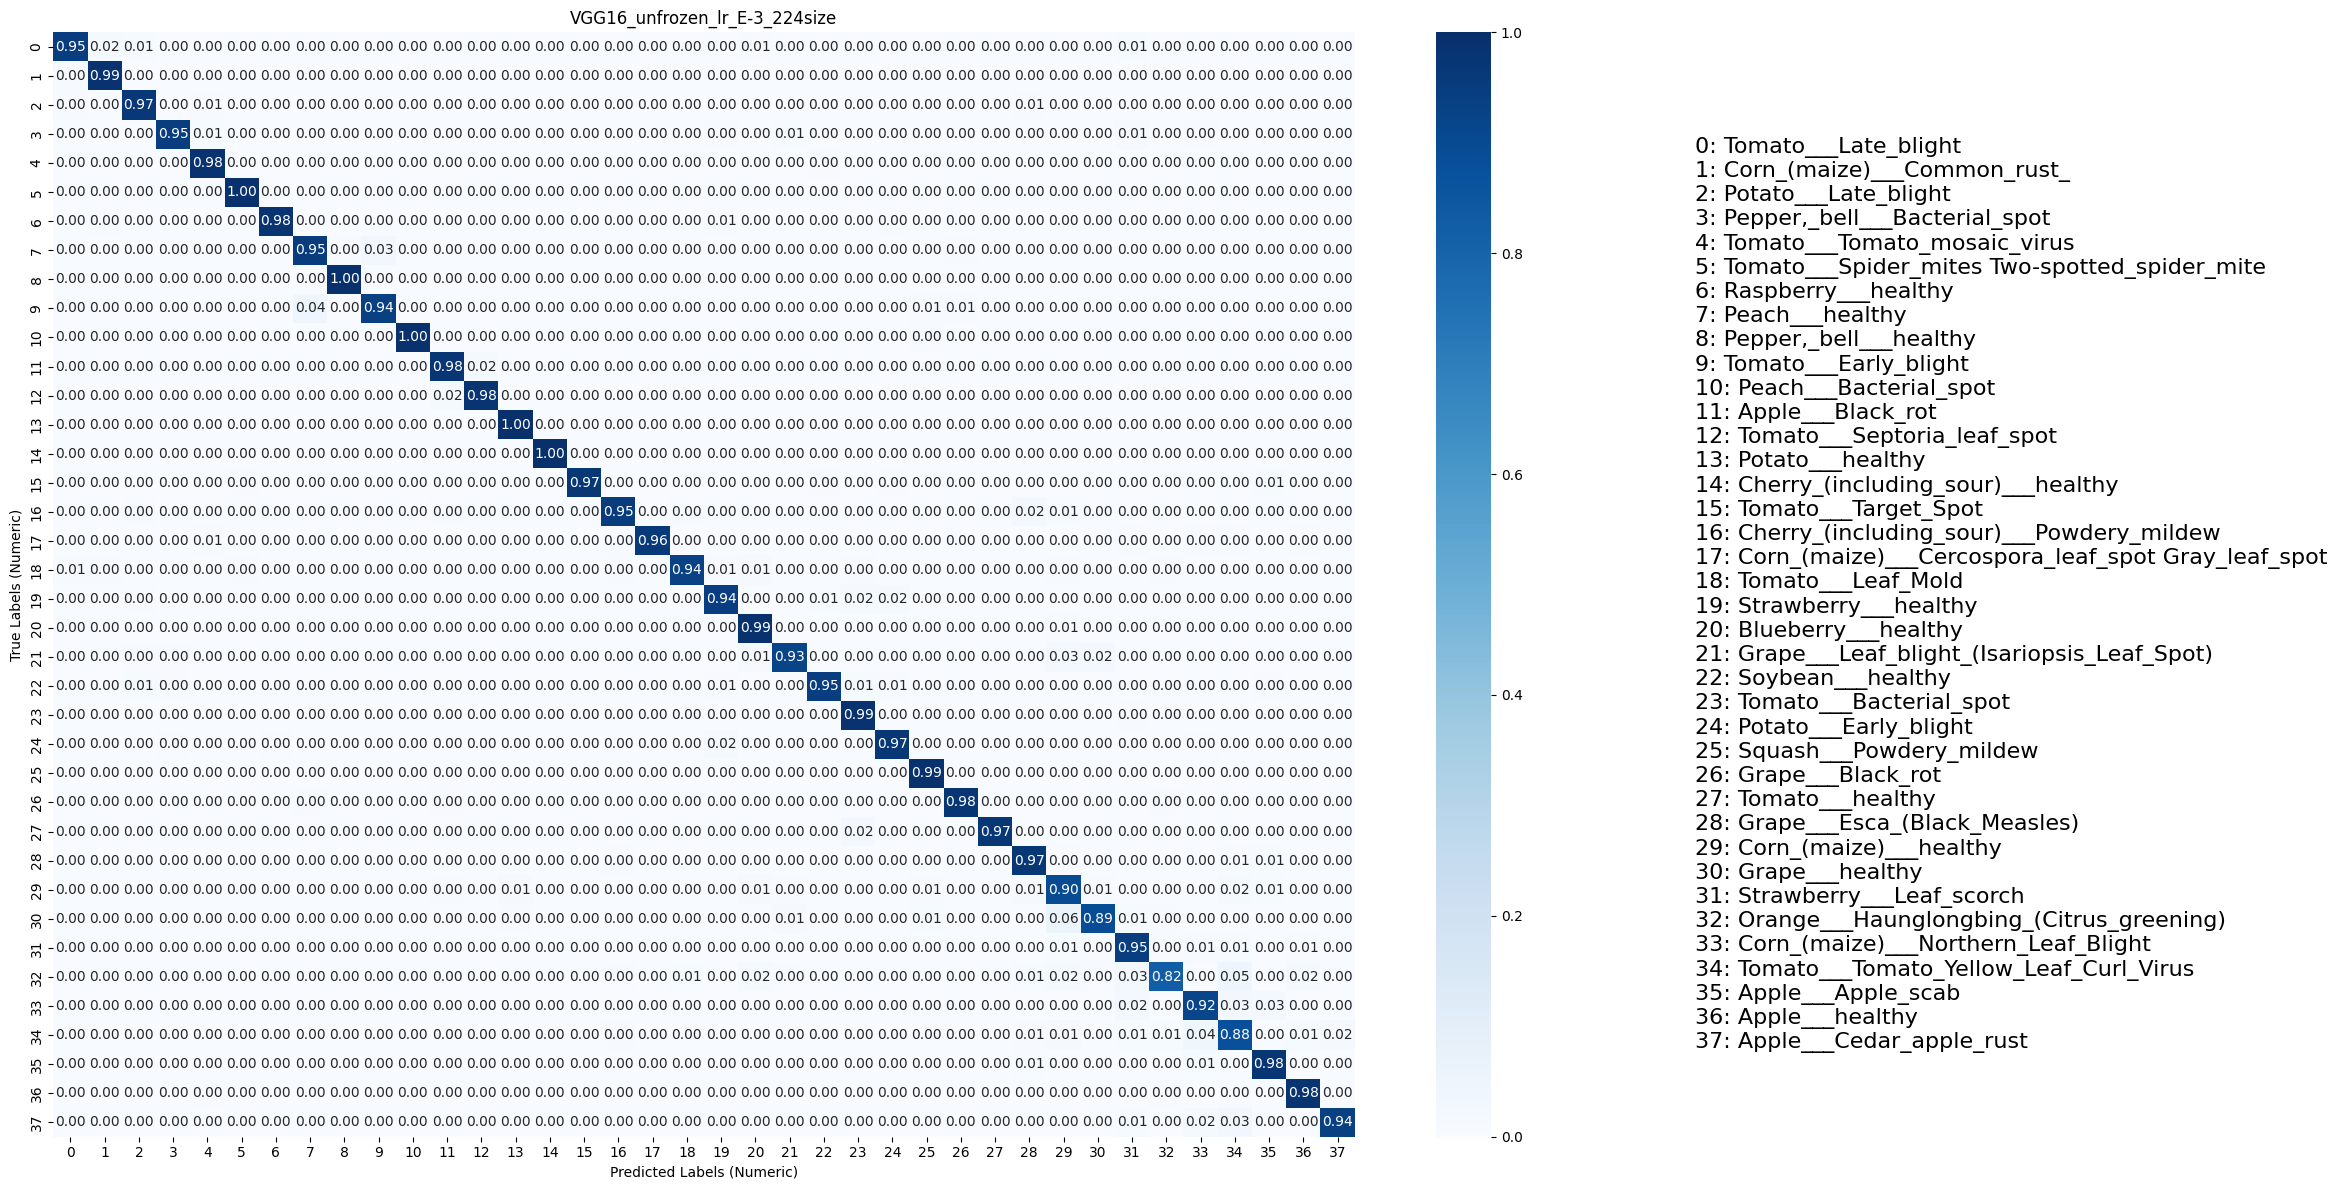

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix (y_true, y_pred, class_names, normalize=False, title=Model_name):
    """
    Plots a heatmap for the confusion matrix with numeric axis labels and a separate legend.

    Parameters:
    - y_true: Array of true labels
    - y_pred: Array of predicted labels
    - class_names: List of class names (for the legend)
    - normalize: If True, normalizes the confusion matrix
    - title: Title for the heatmap
    """
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    # Plot the heatmap
    plt.figure(figsize=(17, 12))
    sns.heatmap(cm, annot=True, fmt=".2f" if normalize else "d", cmap='Blues', cbar=True,
                xticklabels=range(len(class_names)), yticklabels=range(len(class_names)))
    plt.title(title)
    plt.ylabel('True Labels (Numeric)')
    plt.xlabel('Predicted Labels (Numeric)')
    plt.tight_layout()

    # Add a legend for the class names
    plt.gcf().text(1, 0.5,
                   "\n".join([f"{i}: {name}" for i, name in enumerate(class_names)]),
                   fontsize=16, verticalalignment='center', horizontalalignment='left')

    plt.show()

# Extract class names
class_names = [folder_name for folder_name in os.listdir(valid_path) if os.path.isdir(os.path.join(valid_path, folder_name))]
#print("Class Names:", class_names)

plot_confusion_matrix(true_classes, val_pred_classes, class_names, normalize=True)




# Evaluation on test folder

Evaluation on the test folder

In [ ]:
import os
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array
import re

# Define helper function to preprocess a single image
def preprocess_image(image_path, target_size):
    img = load_img(image_path, target_size=target_size)  # Load image and resize
    img_array = img_to_array(img) / 255.0               # Convert to array and rescale
    return img_array

# Load and preprocess all images from the test folder
def load_test_images(test_path, target_size):
    test_images = []
    filenames = []
    for file in os.listdir(test_path):
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):  # Supported file formats
            file_path = os.path.join(test_path, file)
            test_images.append(preprocess_image(file_path, target_size))
            filenames.append(file)  # Save filenames for reference
    return np.array(test_images), filenames

# Function to check if prediction is correct based on common words
def is_prediction_correct(file_name, predicted_label):
    # Extract meaningful words from file name (split camel case or concatenated words)
    file_name = re.sub(r'\.\w+$', '', file_name)  # Remove file extension
    file_words = set(word.lower() for word in re.findall(r'[A-Z][a-z]*|[a-z]+', file_name))  # Handle camel case and lowercase

    # Extract meaningful words from predicted label
    label_words = set(word.lower() for word in re.findall(r'[A-Za-z]+', predicted_label))  # Convert to lowercase

    # Check if all file words are in the label words
    is_subset = file_words.issubset(label_words)

    # Debugging output to verify
    #print(f"File Words: {file_words}, Label Words: {label_words}, Is Subset: {is_subset}")

    return is_subset

# Parameters
IMG_SIZE = (224,224)  # Adjust to model's input size
test_path = test_path  # Define the test folder path

# Load and preprocess test images
test_images, filenames = load_test_images(test_path, target_size=IMG_SIZE)

# Make Predictions
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)

# Map predictions to class labels
class_labels = train_generator.class_indices
class_indices = {v: k for k, v in class_labels.items()}  # Reverse mapping of class indices
predicted_labels = [class_indices[idx] for idx in predicted_classes]

# Process and evaluate predictions
results = []

for file, pred, label in zip(filenames, predictions, predicted_labels):
    confidence = np.max(pred)  # Get the highest probability (confidence score)
    is_correct = is_prediction_correct(file, label)  # Check prediction correctness
    results.append({"True class": file, "prediction": label, "confidence": confidence, "Correct": int(is_correct)})
    print(f"True class: {file}, Prediction: {label}, Confidence: {confidence:.2f}, Correct: {is_correct}")

# Summary of results
correct_predictions = sum(result['Correct'] for result in results)
total_predictions = len(results)
accuracy = correct_predictions / total_predictions if total_predictions > 0 else 0
print(f"Total Predictions: {total_predictions}, Correct: {correct_predictions}, Accuracy: {accuracy:.2%}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step
True class: PotatoEarlyBlight5.JPG, Prediction: Potato___Early_blight, Confidence: 1.00, Correct: True
True class: TomatoEarlyBlight2.JPG, Prediction: Tomato___Early_blight, Confidence: 0.97, Correct: True
True class: PotatoEarlyBlight4.JPG, Prediction: Potato___Early_blight, Confidence: 1.00, Correct: True
True class: TomatoYellowCurlVirus2.JPG, Prediction: Tomato___Tomato_Yellow_Leaf_Curl_Virus, Confidence: 1.00, Correct: True
True class: PotatoHealthy2.JPG, Prediction: Potato___healthy, Confidence: 1.00, Correct: True
True class: CornCommonRust3.JPG, Prediction: Corn_(maize)___Common_rust_, Confidence: 1.00, Correct: True
True class: AppleCedarRust2.JPG, Prediction: Apple___Cedar_apple_rust, Confidence: 1.00, Correct: True
True class: PotatoEarlyBlight1.JPG, Prediction: Potato___Early_blight, Confidence: 1.00, Correct: True
True class: AppleCedarRust1.JPG, Prediction: Apple___Cedar_apple_rust, Confidence: 1.00, Correct: True
True class: AppleCedar